_wave_params(nchannels=1, sampwidth=4, framerate=48000, nframes=952320, comptype='NONE', compname='not compressed')


C:\Users\zimme\AppData\Local\Temp\ipykernel_21208\1231318424.py:23: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.ylim(0,4.0e-13)


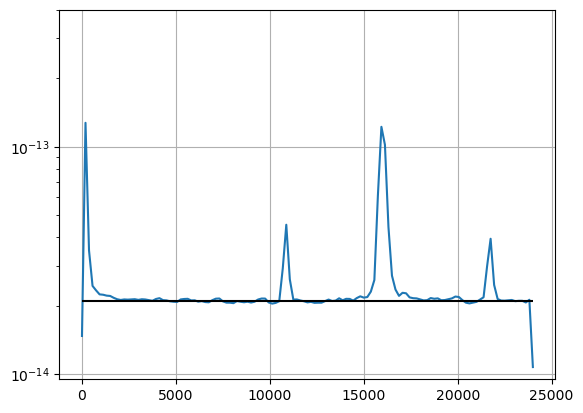

In [152]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

fname='../../desktop/LC-Cal/F20240721_172040.wav'; N=9.35e-15; R=4060; # 4.06k 9.35 x e-15
fname='../../desktop/LC-Cal/F20240722_070340.wav'; N=1.4e-13; R=76700;
fname='../../desktop/LC-Cal/F20240722_071400.wav'; N=3.e-15; R=0;
fname='../../desktop/LC-Cal/F20240722_072500.wav'; N=7e-14; R=44200;
fname='../../desktop/LC-Cal/F20240722_085200.wav'; N=1.25e-13; R=11600;
fname='../../desktop/LC-Cal/F20240722_091800.wav'; N=2.1e-14; R=11400;
with wave.open(fname) as wf:
    metadata = wf.getparams()
    frames = wf.readframes(metadata.nframes)

data = np.frombuffer(frames, dtype="int32")/2**31
print(metadata)
fs=metadata.framerate
#
f,pxx=signal.welch(data,fs=fs)
#
plt.semilogy(f,pxx)
plt.ylim(0,4.0e-13)
plt.hlines(N,0,f[-1],'k')
plt.grid(True)
plt.show()

In [166]:
R=np.array([4060,     11400,   44200,  75500   ,76700])
vm=(2e+9)**2
V=np.array([9.35e-15, 2.1e-14, 7e-14,1.25e-13, 1.4e-13])*vm
V0=3e-15*vm
ktb=0.016173 #nV^2/ohm/Hz
A=(V-V0)
MI=A/(A@A)
#
e2=V0*ktb*(R@A)/(A@A)
print('e_n:',np.sqrt(e2))
print('Gain:',np.sqrt(V0/e2))



e_n: 5.372972090218136
Gain: 20.38806635539137
